### MAP556, Ecole Polytechnique, 2023-24


# TP2 - Simulation de file d'attentes M/M/1 et M/M/c.


Dans la nomenclature de Kendall, les files d'attentes M/M/ correspondent à des temps d'arrivées successives indépendants distribués selon une loi exponentielle, et le temps de traitement d'un client dans une file d'attente suit un comportement similaire.

Le premier paramètre $\lambda$ est le nombre moyen d'arrivées par unité de temps. Le deuxième paramètre $\mu$ est le nombre moyen de clients traités par unité de temps.

Le but du TP est de calculer/simuler le nombre moyen de clients dans la file d'attente, et le temps moyen qu'un client reste dans le système avant d'être traité.

## Exercice 1. Simulation de variables aléatoires dans Python. Loi exponentielle.

### 1.1 Fonction de répartition.

#### $\blacktriangleright$ Question [math+code] (a) : Expliquer comment à l'aide de la fonction de répartition $F$ de la loi exponentielle $\mathcal{E}(\lambda)$ et d'un échantillon $(U_i)_{1\leq i\leq N}$de $N$ variables  i.i.d. de loi uniforme $\mathcal{U}(0,1)$ peut-on obtenir un échantillon $(E_i)_{1\leq i\leq N}$ de $N$ variables  i.i.d. de loi exponentielle $\mathcal{E}(\lambda)$ de paramètre $\lambda$.

On pourra utiliser la fonction `numpy.random.rand` pour obtenir les tirages de la loi uniforme.

In [54]:
import numpy as np
import matplotlib.pyplot as plt

#### Réponse [math] (a) : 
#>>>>>> Compléter <<<<<<
La fonction de répartition $F$ d'une variable exponentielle $\mathcal{E}(\lambda)$ est 

$F(x)=1−exp(−\lambda x)$
Pour obtenir un echantillon de  $(E_i)_{1\leq i\leq N}$  de loi $\mathcal{E}(\lambda)$ on genere un tirage iid $(U_i)_{1\leq i\leq N}$ de variables uniformes grace  numpy.random.rand et on utilise l'inverse de F. On aura

$E_i= -\frac{1}{\lambda}ln(1-U_i)$\
Les $(E_i)_{1\leq i\leq N}$  sont  i.i.d. de loi exponentielle $\mathcal{E}(\lambda)$ de paramètre $\lambda$

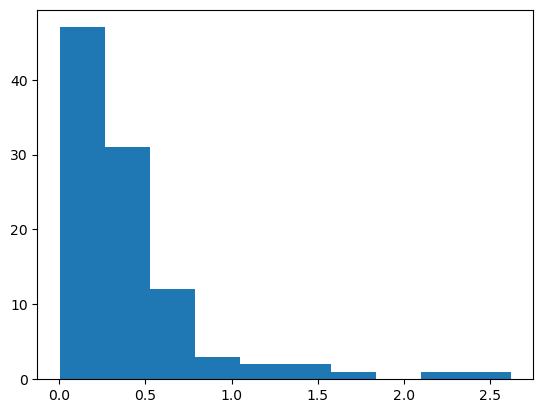

In [55]:
###################################################
# Réponse [code] (a) :
###################################################

N = 100 # Nombre de tirages
Uniform = np.random.rand(N) # Tirages independants de la loi uniforme sur [0,1]

###################################################
## Génération d'un échantillon de loi exponentielle
param_lambda = 2
Expo = (-1/param_lambda)*np.log(1-Uniform)

# ATTENTION: la fonction random.exponential prend comme premier argument
# la moyenne 1/lambda de la distribution, et non pas son parametre lambda
# Expo = np.random.exponential(1/param_lambda, N)

###################################################
## Affichage de l'échantillon
plt.hist(Expo, label="Histogramme de l'échantillon")

# On affiche la figure dans la console
plt.show()

#### $\blacktriangleright$ Question [code] (a-bis) : Pour pouvoir être utilisé plus tard, on pourra encapsuler le code précédent dans deux fonctions avec comme paramètres le taux d'arrivée $\lambda$, le taux de traitement $\mu$, ainsi que la taille de l'échantillon.

In [56]:
###################################################
# Réponse [code] (a-bis) :
###################################################

def simule_temps_inter_arrivees(taux_arrivee, nombre_total_clients):
    temps_inter_arrivees=np.random.exponential(scale=1/taux_arrivee,size=nombre_total_clients)
    return temps_inter_arrivees


def simule_temps_traitement(taux_traitement, nombre_total_clients):
    temps_traitement=np.random.exponential(scale=1/taux_traitement,size=nombre_total_clients)
    return temps_traitement

#### $\blacktriangleright$ Question [code] (b) : Tracer une fonction de répartition empirique de l'échantillon obtenu pour vérifier l'adéquation de votre simulation avec la fonction de répartition théorique.
On rappelle que la fonction de répartition empirique pour un échantillon $(X_i)_{1\leq i\leq N}$ est défini par la formule suivante :
$$
F_N := x \mapsto \frac{1}{N} \sum_{i=1}^N 1_{X_i \leq x}
$$
pour tout $x\in\mathbb{R}$.

On notera que cet objet est une variable aléatoire contrairement à la fonction de répartition qui est un objet déterministe.

#### Réponse [code] (b) : 
#>>>>>> Compléter <<<<<<

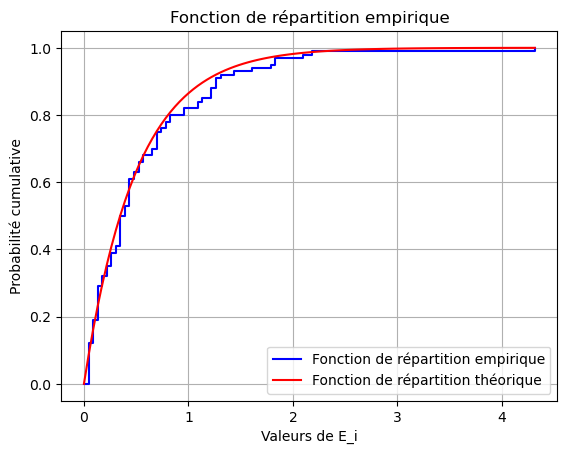

In [57]:
###################################################
# Réponse [code] (b) :
###################################################

##################################################
## Calcul de la fonction de répartition empirique
#>>>>>> Compléter <<<<<<
def fonction_rep_emp(echantillon,x):
    return np.mean(echantillon<=x)

echantillon = np.random.exponential(scale=1/param_lambda, size=N)
###################################################
## Affichage des fonctions de répartition


x = np.linspace(0,np.max(echantillon),N)
Fonc_Rep_Th = 1 - np.exp(-param_lambda * x)
Fonc_Rep_emp=[fonction_rep_emp(echantillon,z) for z in x]



plt.step(x,Fonc_Rep_emp ,where='post', color="b", label="Fonction de répartition empirique")
# L'argument "where='post'" permet d'afficher le dernier saut de la fonction de répartition empirique.
plt.plot(x, Fonc_Rep_Th, color="r", label="Fonction de répartition théorique")

plt.xlabel('Valeurs de E_i')
plt.ylabel('Probabilité cumulative')
plt.title('Fonction de répartition empirique')
plt.legend(loc="best")
plt.grid(True)
# On affiche la figure dans la console
plt.show()

#### $\blacktriangleright$ Question [math] (b - facultative - culture-générale) :  Peut-on caractériser la convergence de $F_N$ vers $F$ ? Et surtout selon quelle notion de convergence ?

#### Réponse [math] (b - question facultative - culture générale) :
#>>>>>> Compléter <<<<<<

### 1.2 Processus de Poisson et temps d'arrivées.

#### $\blacktriangleright$ Question [code] (c) : Les variables exponentielles génèrent les temps entre deux arrivées successives $T_i$ et $T_{i+1}$ dans la file d'attente : si on note $T_0=0$, alors $T_{i+1}-T_{i} = E_i$, où les $(E_i)$ sont i.i.d. exponentielles de paramètres $\lambda >0$.

#### Réponse [code] (c) : 
#>>>>>> Compléter <<<<<<

In [58]:
###################################################
# Réponse [code] (c) :
###################################################

E_i = np.random.exponential(scale=1/param_lambda, size=N)
T_i=np.cumsum(E_i)
T_i = np.insert(T_i, 0, 0)

#### $\blacktriangleright$ Question [math+code] (d) : Pouvez-vous donner un ordre de grandeur du comportement de $T_N$ lorsque $N$ tend vers $+\infty$ ? Simulez un échantillon de taille $M$ de variables aléatoires $T_N$ avec $N$ et $M$ grands pour vérifier votre conjecture. On pourra s'appuyer sur les résultats fournis par la loi forte des grand nombres et le théorème central limite.

#### Réponse [math] (d) : 
#>>>>>> Compléter <<<<<<

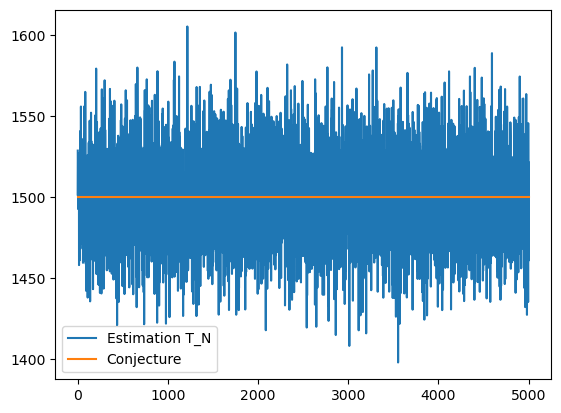

In [59]:
###################################################
# Réponse [code] (d) :
# Loi forte des grands nombres.
###################################################

N = 3000 # Nombre N de variables aléatoires E_i pour calculer T_N.
M = 5000 # Taille de l'échantillon pour l'estimation Monte-Carlo.

####################################################
# Tirages independants de N*M v.a. exponentielles
# de parametre lambda=2.
param_lambda = 2
# ATTENTION: la fonction random.exponential prend comme premier argument
# la moyenne 1/lambda de la distribution, et non pas son paramètre lambda.
Expo = np.random.exponential(1/param_lambda, (M, N))

####################################################
# Espérance et variance de la loi exponentielle.
esp = 1/param_lambda
var = (1/param_lambda)**2

####################################################
# Stocker dans la variable 'T_N' un echantillon de M valeurs.
T_N = np.sum(Expo,axis=1)
# Renormaliser la variable 'T_N' pour obtenir une convergence vers une constante.
moyT_N = np.mean(T_N)
# Stocker dans la variable 'erreurNormalisee_N' l'échantillon de M valeurs
# de l'erreur normalisée
erreurNormalisee_N = (moyT_N-esp*N)/(np.sqrt(var/N))

####################################################
# Affichage des valeurs aléatoires et de votre conjecture
Conjecture = esp*N
plt.plot(T_N, label="Estimation T_N")
plt.plot([1,M],[Conjecture,Conjecture],label="Conjecture")
plt.legend(loc="best")

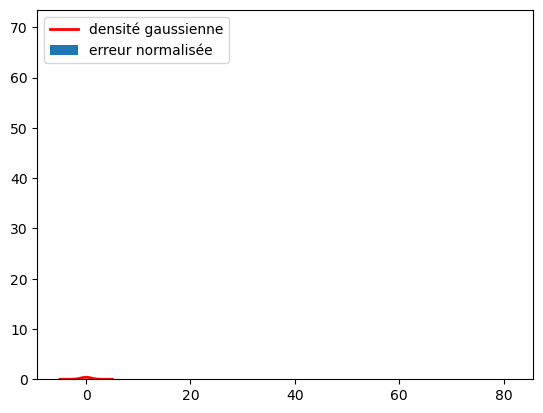

In [60]:
###################################################
# Réponse [code] (d) :
# Théorème Central Limite
###################################################

N = 3000 # Nombre N de variables aléatoires E_i pour calculer T_N.
M = 5000 # Taille de l'échantillon pour l'estimation Monte-Carlo.

####################################################
# Tirages indépendants de N*M v.a. exponentielles
# de paramètre lambda=2.
param_lambda = 2
# ATTENTION: la fonction random.exponential prend comme premier argument
# la moyenne 1/lambda de la distribution, et non pas son paramètre lambda.
Expo = np.random.exponential(1/param_lambda, (M, N))

####################################################
# Espérance et variance de la loi exponentielle.
esp = 1/param_lambda
var = (1/param_lambda)**2

####################################################
# Stocker dans la variable 'T_N' un echantillon de M valeurs.
T_N =np.sum(Expo,axis=1)
# Renormaliser la variable 'T_N' pour obtenir une convergence vers une constante.
moyT_N = np.mean(T_N)
# Stocker dans la variable 'erreurNormalisee_N' l'échantillon de M valeurs
# de l'erreur normalisée.
erreurNormalisee_N = (moyT_N-esp*N)/(np.sqrt(var/N))

####################################################
# Affichage
plt.hist(erreurNormalisee_N, density="True", bins=int(np.sqrt(M)), label="erreur normalisée")
x = np.linspace(-5,5,100)
#>>>> Completer avec le calcul de la densité gaussienne centrée réduite sur les abscisses x.
densiteGaussienne = np.exp(-x*x/2.) / np.sqrt(2. * np.pi)

plt.plot(x,densiteGaussienne, color="red", label="densité gaussienne", linewidth=2.0)
plt.legend(loc="best")

In [61]:
erreurNormalisee_N

80.90872407862902

## Exercice 2. Simulation d'une file d'attente.
### 2.1 Un seul serveur de traitement. File d'attente M/M/1

On fixe le taux d'arrivée $\lambda=2$ et le taux de traitement $\mu=3$.

On rappelle la dynamique d'une file d'attente M/M/1 :
- Il n'y a qu'un seul serveur uniquement capable de traiter une personne à la fois.
- Quand un nouveau client arrive : 
-- Si le serveur est libre, alors le serveur traite le client immédiatement. Dès que le client a été traité, il quitte la zone et libère le serveur.
-- Si au contraire, le serveur est occupé par un client, le client s'ajoute à la file d'attente en attendant que le serveur se libère.
- On précise que la file d'attente est une FIFO (first in, first out).

#### $\blacktriangleright$ Question [code] (a) : Compléter le code suivant qui enregistre les temps d'arrivées et les temps de traitement de 10 clients.

In [62]:
###################################################
# Réponse [code] (a) :
###################################################

####################################################
# Paramètres de la simulation.
param_lambda = 2.0  # Taux d'arrivée.
param_mu = 3.0  # Taux de traitement.
nombre_total_clients = 10  # Nombre total de clients à simuler.

####################################################
# Génération des temps d'arrivées et de traitement.
temps_inter_arrivees =simule_temps_inter_arrivees(param_lambda,nombre_total_clients)
temps_traitement = simule_temps_traitement(param_mu,nombre_total_clients) # Les temps de traitement des clients par le serveur.
temps_arrivees = np.cumsum(temps_inter_arrivees) # Les temps d'arrivées des nouveaux clients.

####################################################
# Initialise les temps de sortie de file et les temps d'attente.
temps_sortie = np.zeros(nombre_total_clients) # Le moment où le client sort de la zone
temps_attente = np.zeros(nombre_total_clients) # Le temps d'attente dans la file
longueur_file = np.zeros(nombre_total_clients) # Pour enregistrer le nombre de clients dans la file d'attente à chaque instant

####################################################
# Simule la file d'attente M/M/1.
for i in range(nombre_total_clients):
    if i == 0:
        temps_sortie[i] = temps_arrivees[i]+temps_traitement[i]
    else:
        temps_entree_serveur = max(temps_arrivees[i], temps_sortie[i-1])
        temps_sortie[i] = temps_entree_serveur +temps_traitement[i]
        temps_attente[i] = temps_entree_serveur - temps_arrivees[i]
        
    # Calcul du nombre de clients dans la file d'attente à cet instant
    longueur_file[i] = max(0, np.searchsorted(temps_arrivees, temps_sortie[i])-i-1)

####################################################
# Affiche les résultats de la simulation.
for i in range(nombre_total_clients):
    print(f"\nLe client {i+1} est arrivé à {temps_arrivees[i]:.3f}s, "
          f"est traité par le serveur en {temps_traitement[i]:.3f}s, "
          f"quitte le serveur à {temps_sortie[i]:.3f}, "
          f"en ayant attendu {temps_attente[i]:.3f}s dans la file d'attente "
          f"qui possède {longueur_file[i]:.3f} clients en attente quand il sort.")
    
print(f"\n Le temps moyen d'attente de ces {nombre_total_clients} clients est de {np.mean(temps_attente):.3f}s.")    
print(f"\n Le nombre moyen de clients en attente est de {np.mean(longueur_file):.3f}.")    



Le client 1 est arrivé à 0.057s, est traité par le serveur en 0.065s, quitte le serveur à 0.121, en ayant attendu 0.000s dans la file d'attente qui possède 1.000 clients en attente quand il sort.

Le client 2 est arrivé à 0.117s, est traité par le serveur en 0.354s, quitte le serveur à 0.475, en ayant attendu 0.004s dans la file d'attente qui possède 1.000 clients en attente quand il sort.

Le client 3 est arrivé à 0.340s, est traité par le serveur en 0.035s, quitte le serveur à 0.510, en ayant attendu 0.134s dans la file d'attente qui possède 0.000 clients en attente quand il sort.

Le client 4 est arrivé à 0.702s, est traité par le serveur en 0.306s, quitte le serveur à 1.008, en ayant attendu 0.000s dans la file d'attente qui possède 1.000 clients en attente quand il sort.

Le client 5 est arrivé à 0.835s, est traité par le serveur en 0.125s, quitte le serveur à 1.134, en ayant attendu 0.174s dans la file d'attente qui possède 0.000 clients en attente quand il sort.

Le client 6 es

#### $\blacktriangleright$ Question [code] (b) : Après avoir encapsulé votre algorithme dans une fonction, estimer le temps moyen d'attente, et le nombre moyen de clients en attente, lorsque le nombre de clients simulés tend vers l'infini à l'aide de votre algorithme précédent.

Remarque : Avoir un nombre de clients très grand permet de se placer dans le régime stationnaire. On pourra alors estimer le temps moyen d'attente pour un client arrivant dans une file d'attente stationnaire. A priori, les temps d'attente des premiers clients ne sont effectivement pas significatifs.

In [63]:
###################################################
# Réponse [code] (b) :
###################################################

####################################################
# Fonction de simulation de la file d'attente M/M/1
def simuler_mm1(taux_arrivee, taux_traitement, nombre_total_clients):
    ####################################################
    # Génération des temps d'arrivées et de traitement.
    temps_inter_arrivees = simule_temps_inter_arrivees(param_lambda,nombre_total_clients)
    temps_traitement =simule_temps_traitement(param_mu,nombre_total_clients) 
    temps_arrivees = np.cumsum(temps_inter_arrivees) 

    ####################################################
    # Initialise les temps de sortie de file et les temps d'attente.
    temps_sortie = np.zeros(nombre_total_clients)
    temps_attente = np.zeros(nombre_total_clients)
    longueur_file = np.zeros(nombre_total_clients)
    
    ####################################################
    # Simule la file d'attente M/M/1.
    for i in range(nombre_total_clients):
        if i == 0:
            temps_sortie[i] = temps_arrivees[i]+temps_traitement[i]
        else:
            temps_entree_serveur = max(temps_arrivees[i], temps_sortie[i-1])
            temps_sortie[i] = temps_entree_serveur +temps_traitement[i]
            temps_attente[i] = temps_entree_serveur - temps_arrivees[i]
        
        # Calcul du nombre de clients dans la file d'attente à cet instant
        longueur_file[i] = max(0, np.searchsorted(temps_arrivees, temps_sortie[i])-i-1)

    return temps_attente, longueur_file

In [64]:
nombre_total_clients = 10**6
temps_attente, longueur_file = simuler_mm1(param_lambda,param_mu,nombre_total_clients)
print(f"\n Le temps moyen d'attente de ces {nombre_total_clients} clients est de {np.mean(temps_attente):.3f}s.")    
print(f"\n Le nombre moyen de clients en attente est de {np.mean(longueur_file):.3f}.")


 Le temps moyen d'attente de ces 1000000 clients est de 0.670s.

 Le nombre moyen de clients en attente est de 2.007.


#### $\blacktriangleright$ Question [code] (c) : Estimer le temps moyen d'attente par une procédure Monte-Carlo en réalisant $M$ tirages de votre algorithme précédent (pas forcément avec un grand nombre de clients). Vous pouvez tracer les différentes valeurs obtenues, ainsi qu'un histogramme pour visualiser la loi du temps d'attente.

In [65]:
###################################################
# Réponse [code] (c) :
###################################################

nombre_total_clients = 10**3
nombre_tirages_Monte_Carlo = 10**2 # Nombre de répétitions de votre algorithme.
temps_moyen = np.zeros(nombre_tirages_Monte_Carlo)

####################################################
# Procédure Monte-Carlo pour l'estimation
for m in range(nombre_tirages_Monte_Carlo):
    temps_attentes,_=simuler_mm1(param_lambda,param_mu,nombre_total_clients)
    temps_moyen[m]=np.mean(temps_attentes)

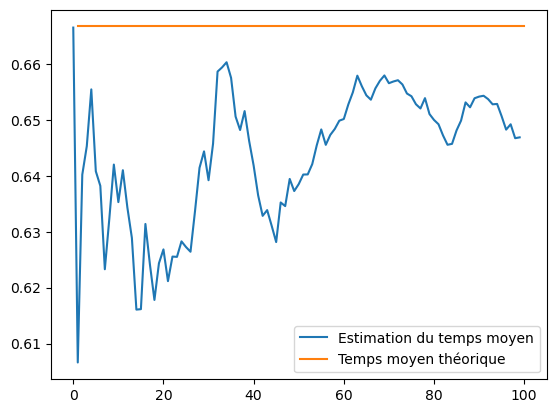

In [66]:
def cummean(x):
    return np.cumsum(x) / np.arange(1,len(x)+1)
####################################################
# Affichage des tirages Monte-Carlo
temps_moyen_theorique = param_lambda/param_mu
plt.plot(cummean(temps_moyen), label="Estimation du temps moyen")
plt.plot([1,nombre_tirages_Monte_Carlo],[temps_moyen_theorique,temps_moyen_theorique],label="Temps moyen théorique")
plt.legend(loc="best") 

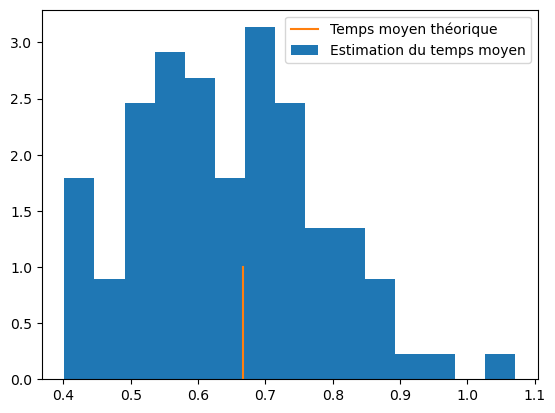

In [67]:
####################################################
# Visualisation de la loi
plt.hist(temps_moyen, density="True", bins=int(15), label="Estimation du temps moyen")
plt.plot([temps_moyen_theorique,temps_moyen_theorique],[0,1],label="Temps moyen théorique")
plt.legend(loc="best")

#### $\blacktriangleright$ Question [code] (d) : Estimer le nombre moyen de clients dans la file d'attente par une procédure Monte-Carlo en réalisant $M$ tirages de votre algorithme précédent (pas forcément avec un grand nombre de clients). Vous pouvez tracer les différentes valeurs obtenues, ainsi qu'un histogramme pour visualiser la loi du nombre de clients en attente. 

In [68]:
###################################################
# Réponse [code] (d) :
###################################################

nombre_total_clients = 10**3
nombre_tirages_Monte_Carlo = 10**2 # Nombre de répétitions de votre algorithme.
nombre_moyen = np.zeros(nombre_tirages_Monte_Carlo)

####################################################
# Procédure Monte-Carlo pour l'estimation
for m in range(nombre_tirages_Monte_Carlo):
    _,longueur_queue = simuler_mm1(param_lambda,param_mu,nombre_total_clients)
    nombre_moyen[m] = np.mean(longueur_queue)

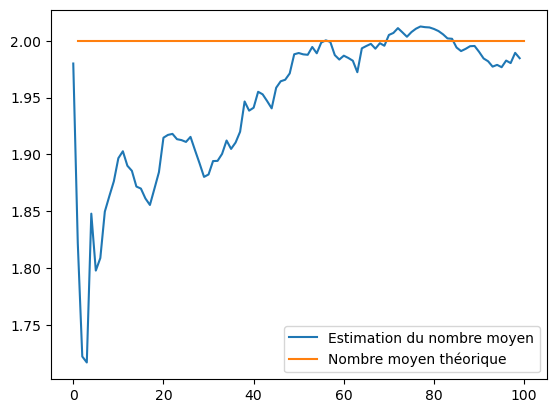

In [69]:
####################################################
# Affichage des tirages Monte-Carlo
nombre_moyen_theorique = param_lambda/(param_mu-param_lambda)
plt.plot(cummean(nombre_moyen), label="Estimation du nombre moyen")
plt.plot([1,nombre_tirages_Monte_Carlo],[nombre_moyen_theorique,nombre_moyen_theorique],label="Nombre moyen théorique")
plt.legend(loc="best")

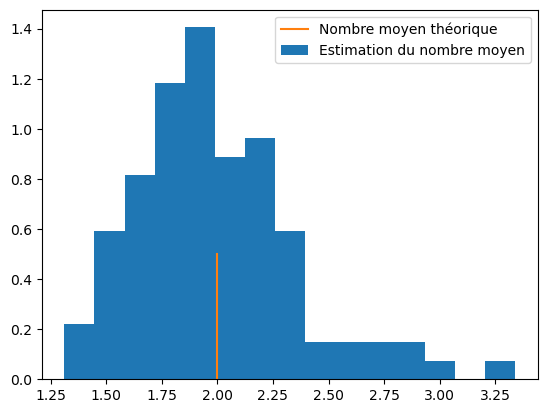

In [70]:
####################################################
# Visualisation de la loi
plt.hist(nombre_moyen, density="True", bins=int(15), label="Estimation du nombre moyen")
plt.plot([nombre_moyen_theorique,nombre_moyen_theorique],[0,0.5],label="Nombre moyen théorique")
plt.legend(loc="best")